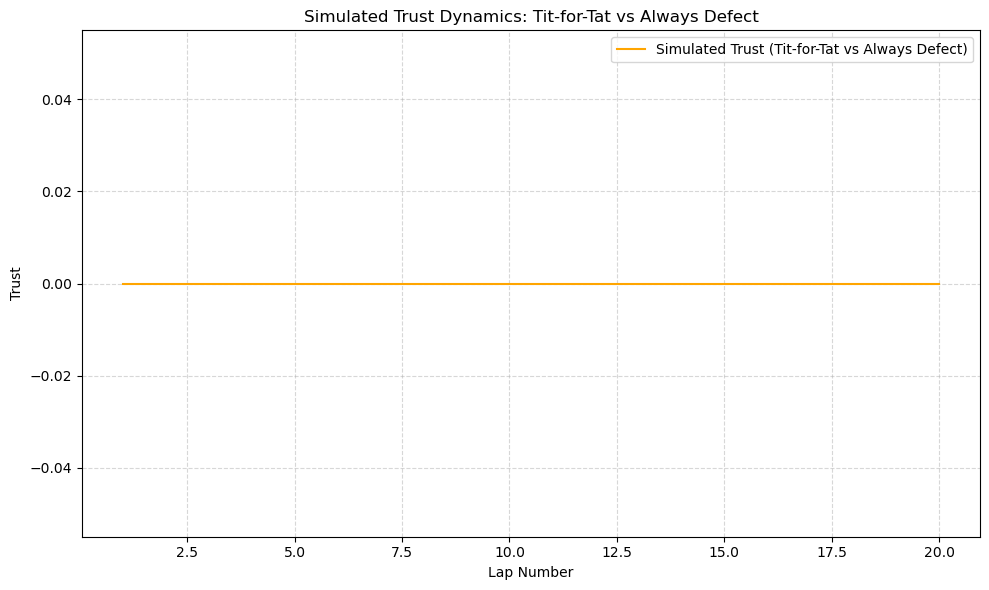

In [1]:
import matplotlib.pyplot as plt


class AlwaysCooperate:
    def act(self):
        return 'cooperate'
    def observe(self, opponent_action):
        pass

class AlwaysDefect:
    def act(self):
        return 'defect'
    def observe(self, opponent_action):
        pass

class TitForTat:
    def __init__(self):
        self.last_opponent_action = 'cooperate'
    def act(self):
        return self.last_opponent_action
    def observe(self, opponent_action):
        self.last_opponent_action = opponent_action


class SimpleRaceEnv:
    def __init__(self, agent1, agent2, laps=20):
        self.agent1 = agent1
        self.agent2 = agent2
        self.laps = laps
        self.trust_history = []
    def run(self):
        a1_action, a2_action = 'cooperate', 'cooperate'
        for _ in range(self.laps):
            self.agent1.observe(a2_action)
            self.agent2.observe(a1_action)
            a1_action = self.agent1.act()
            a2_action = self.agent2.act()
            trust = 1 if a1_action == a2_action == 'cooperate' else 0
            self.trust_history.append(trust)
        return self.trust_history

agent1 = TitForTat()
agent2 = AlwaysDefect()
env = SimpleRaceEnv(agent1, agent2, laps=20)
sim_trust = env.run()

plt.figure(figsize=(10,6))
plt.plot(range(1, 21), sim_trust, label='Simulated Trust (Tit-for-Tat vs Always Defect)', color='orange')
plt.xlabel("Lap Number")
plt.ylabel("Trust")
plt.title("Simulated Trust Dynamics: Tit-for-Tat vs Always Defect")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


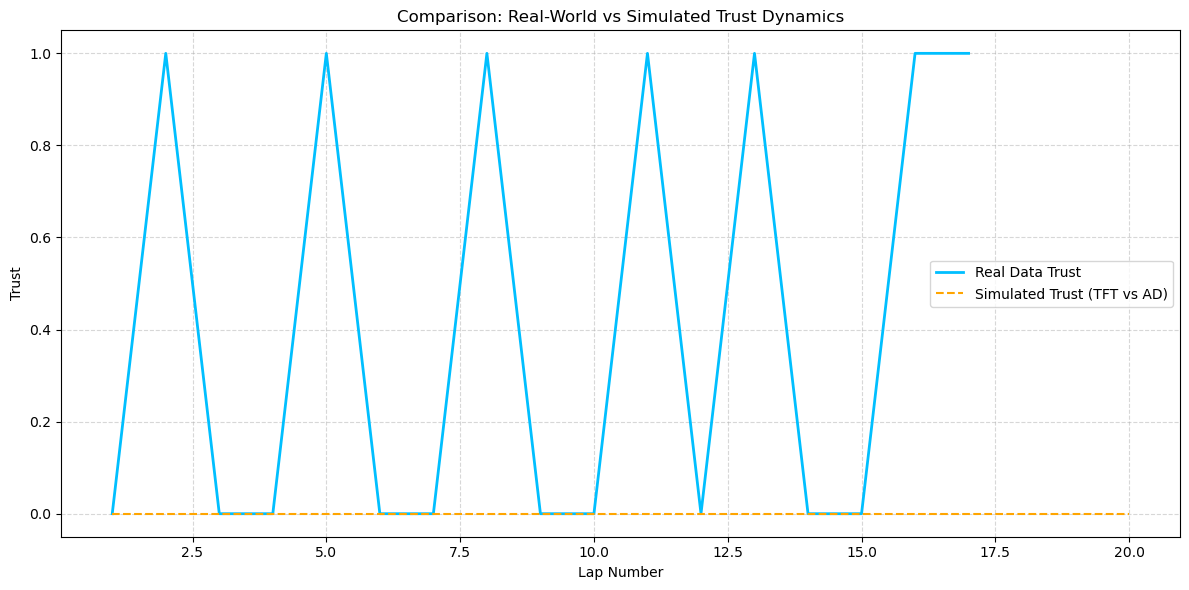

In [3]:
import pandas as pd
df = pd.read_csv(r"C:\Users\manna\trust-dynamics-motorsports\data\raw\lap_data_driver63_session9161.csv")
df['lap_duration'] = pd.to_numeric(df['lap_duration'], errors='coerce')
df['lap_time_diff'] = df['lap_duration'].diff()
df['defection_event'] = (df['lap_time_diff'] > 2.0) | (df['is_pit_out_lap'] == True)
df['trust_level'] = (~df['defection_event']).astype(int)

plt.figure(figsize=(12,6))
plt.plot(df['lap_number'], df['trust_level'], label='Real Data Trust', color='deepskyblue', linewidth=2)
plt.plot(range(1, 21), sim_trust, label='Simulated Trust (TFT vs AD)', color='orange', linestyle='--')
plt.xlabel("Lap Number")
plt.ylabel("Trust")
plt.title("Comparison: Real-World vs Simulated Trust Dynamics")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
